In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
import kaggle

# Authenticate using your Kaggle API key
kaggle.api.authenticate()

# Define the dataset and download path
dataset = 'uciml/forest-cover-type-dataset'
download_path = '.'

# Download and unzip the dataset
kaggle.api.dataset_download_files(dataset, path=download_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset


In [4]:
file = pd.read_csv(r'C:\Users\lauro.telles\Desktop\Web Scrapping\codigo py\forest recover type\covtype.csv')
file.info()
file.shape
print(file.isna().sum())
print(file.columns)
file['Cover_Type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

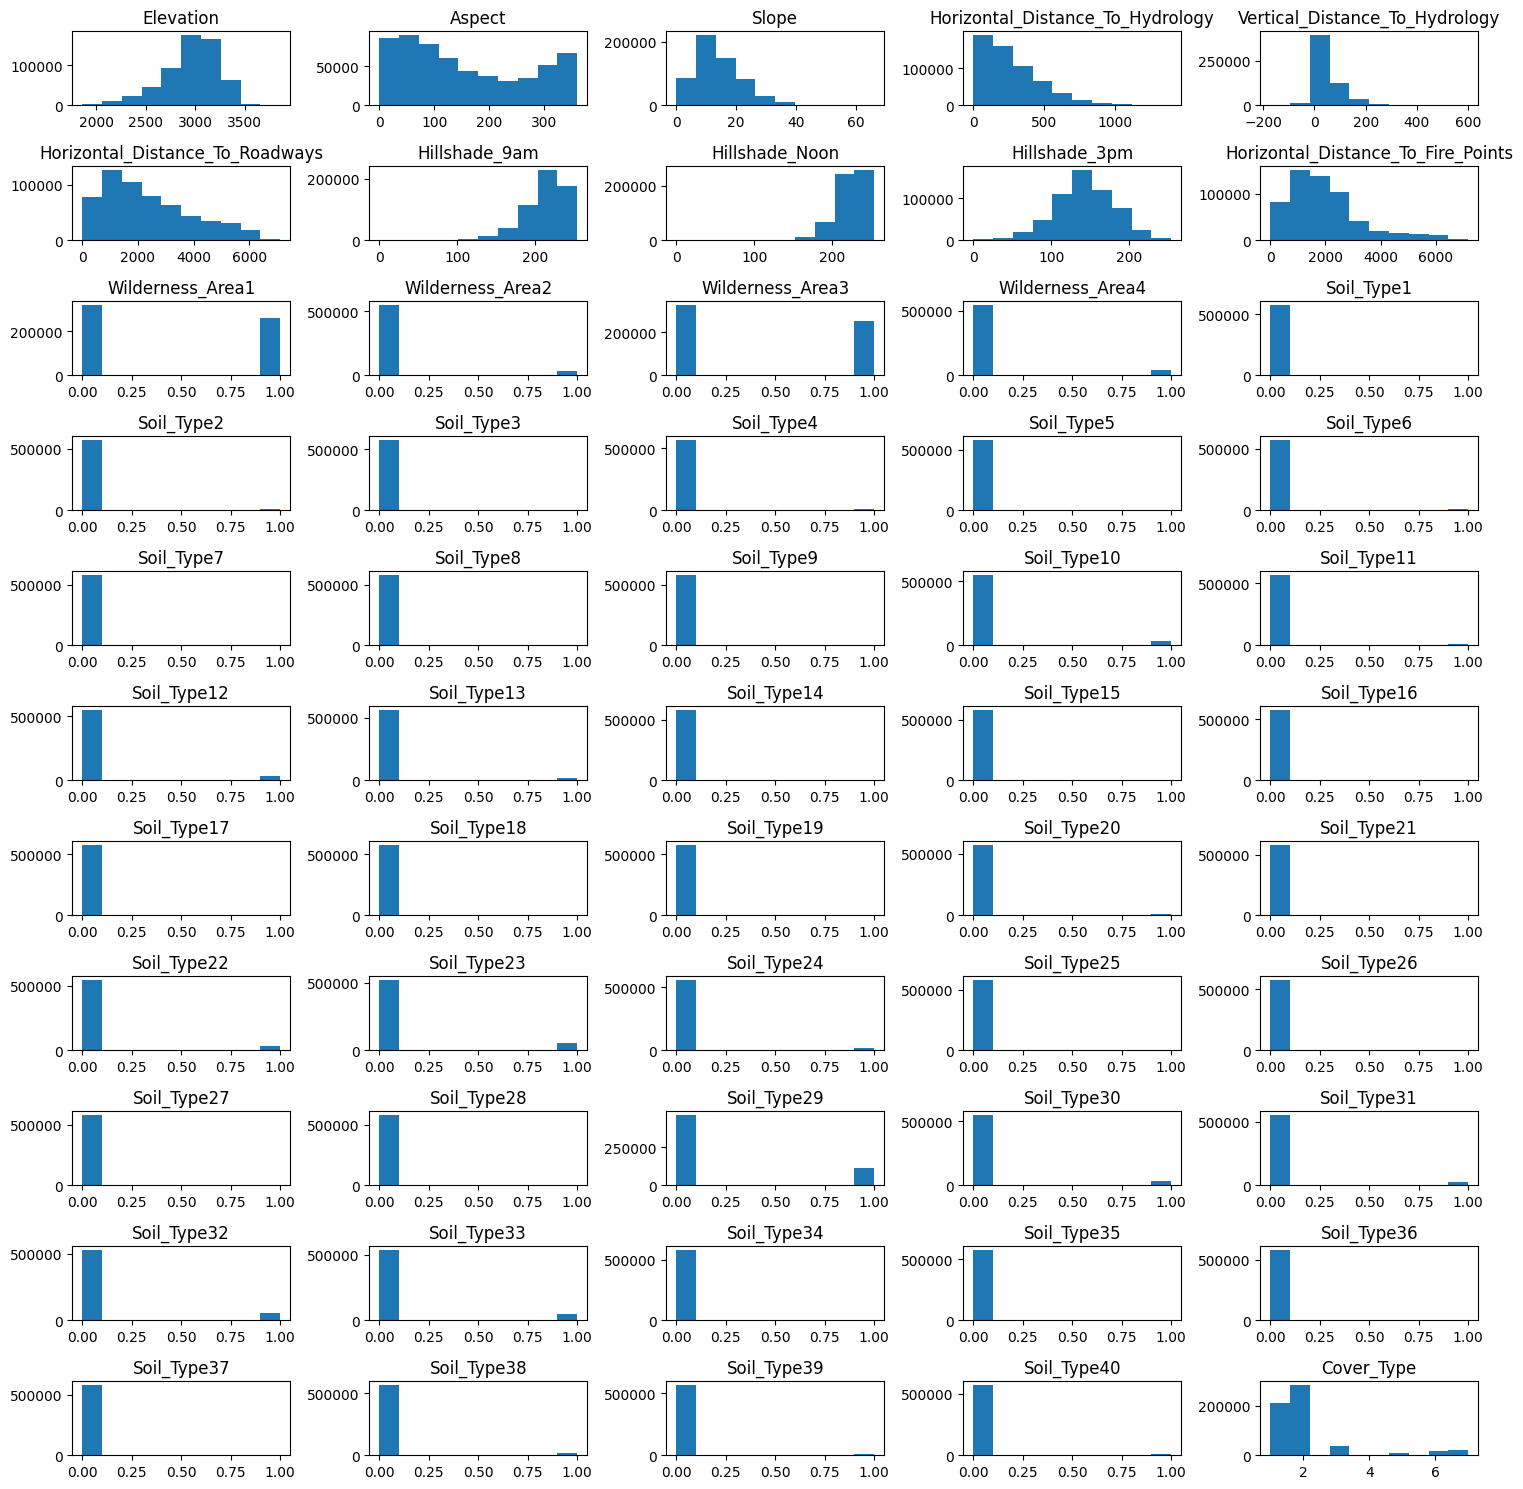

In [5]:
num_cols = len(file.columns)

fig, axes = plt.subplots(11, 5, figsize=(15, 15))


axes = axes.flatten()
for i, col in enumerate(file.columns):
    axes[i].hist(file[col])
    axes[i].set_title(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

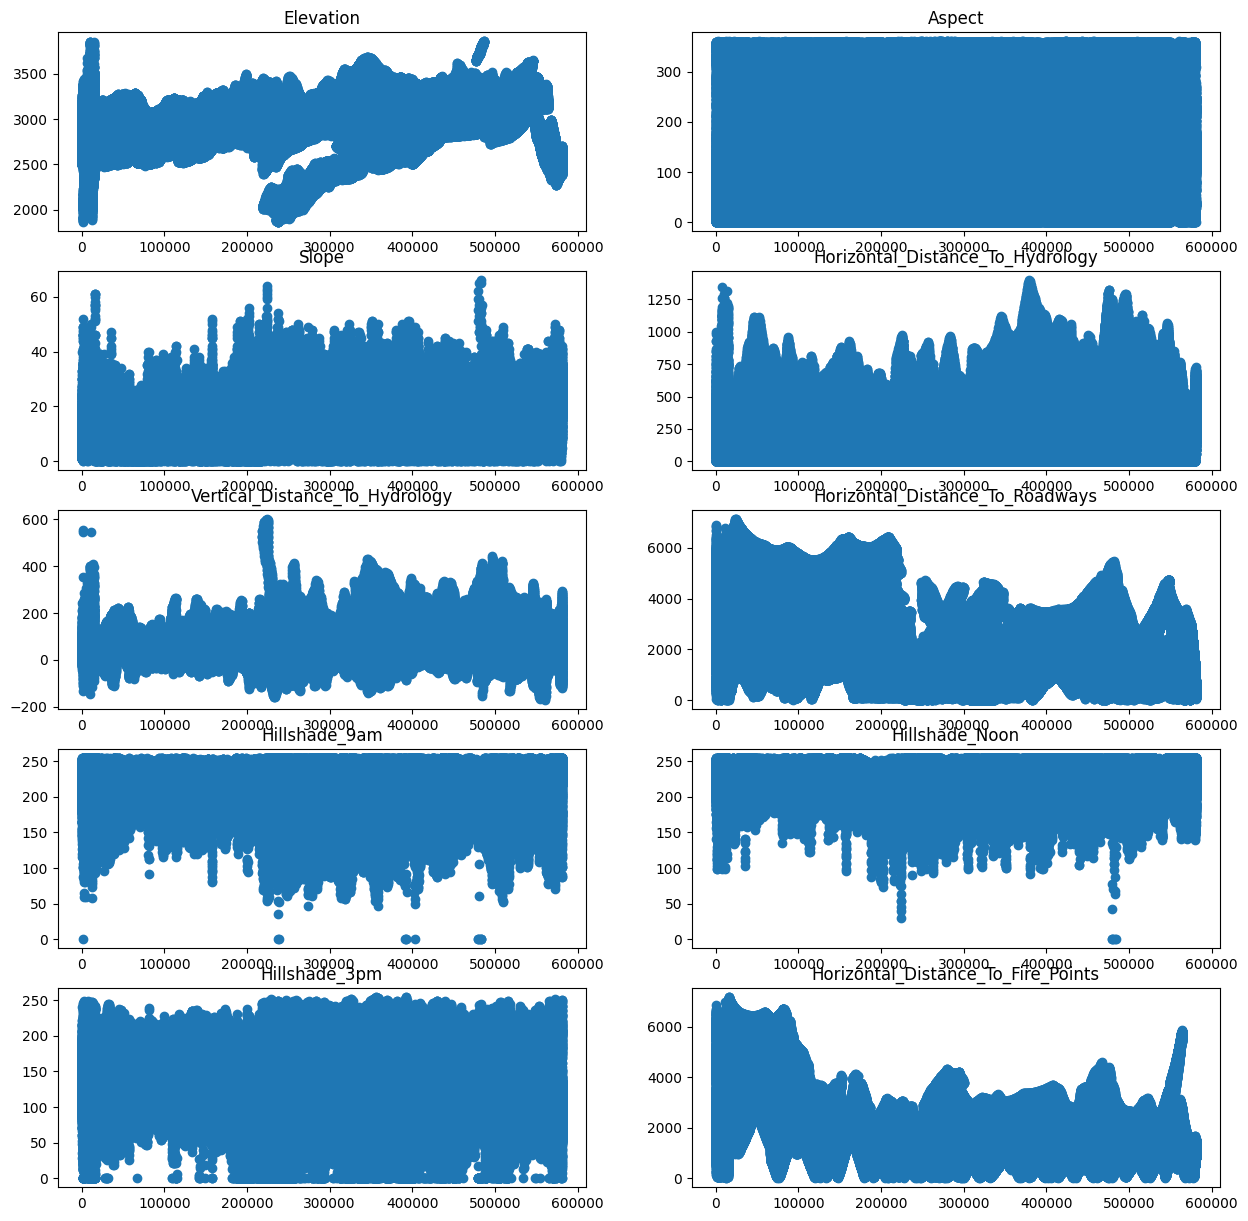

In [6]:
num_cols = file.columns[:11]


fig, axes = plt.subplots(5, 2, figsize=(15, 15))


axes = axes.flatten()


for i, col in enumerate(file.columns):
    axes[i].scatter(file.index, file[col])
    axes[i].set_title(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

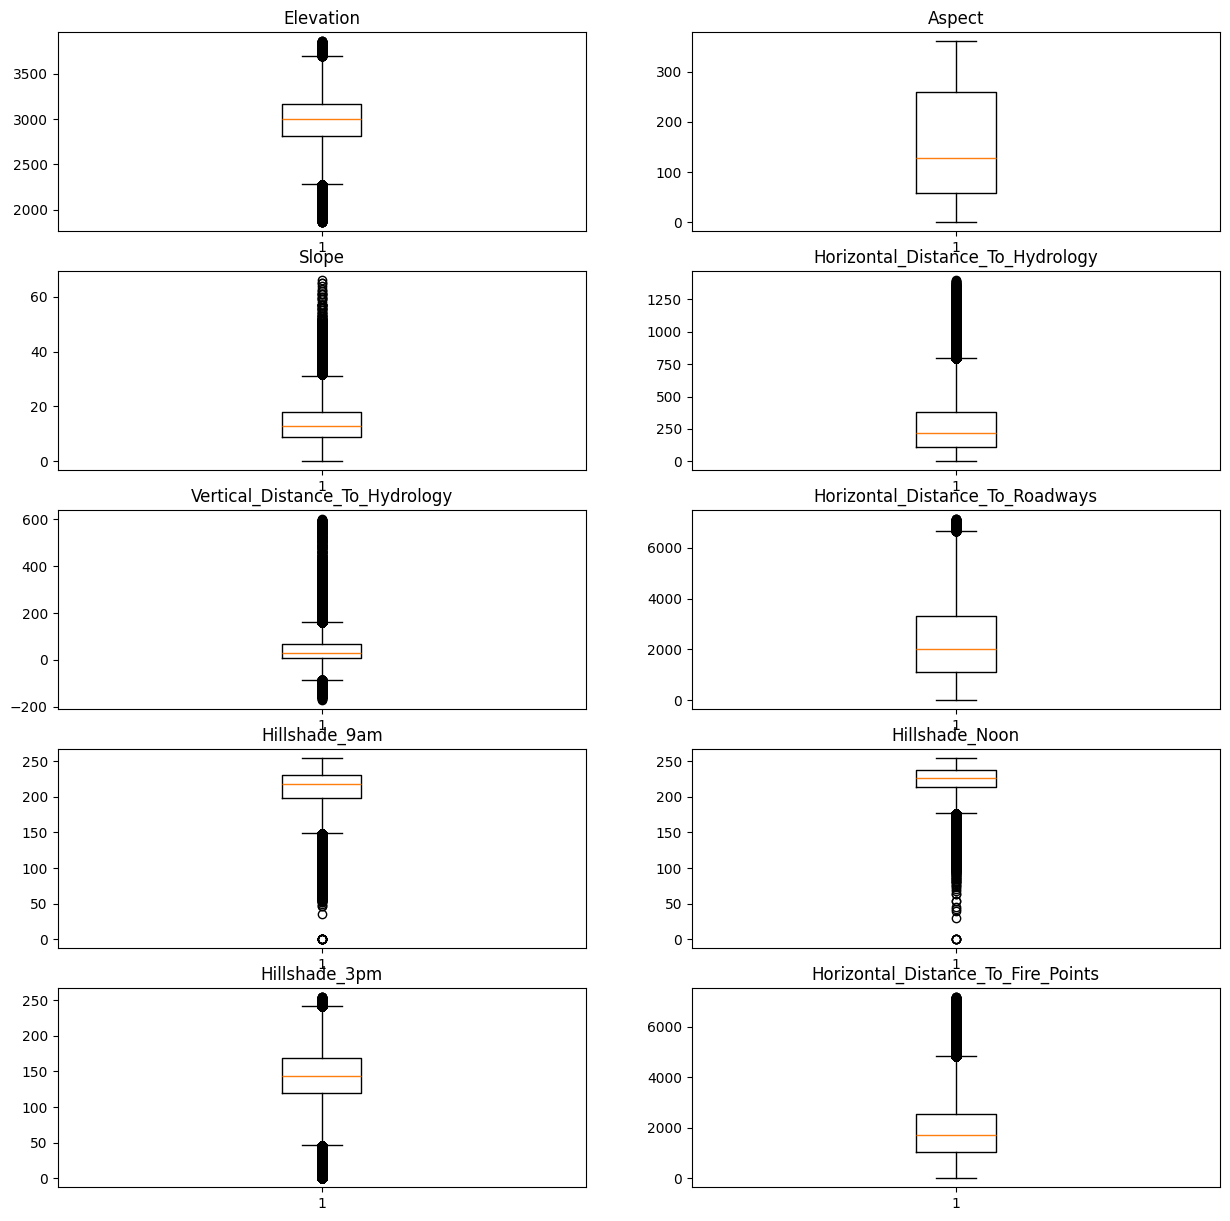

In [7]:
num_cols = file.columns[:11]


fig, axes = plt.subplots(5, 2, figsize=(15, 15))

axes = axes.flatten()


for i, col in enumerate(num_cols):
    axes[i].boxplot(file[col])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
# Models
from sklearn.metrics import roc_auc_score, roc_curve, mean_absolute_error,mean_squared_error,auc
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

version1 = file


version1 = scaler.fit_transform(file.drop('Cover_Type',axis = 1))

scaled_features_df = pd.DataFrame(version1, columns=file.columns[:-1])

version1_x = scaled_features_df
version1_y = file['Cover_Type']


X_train, X_test, y_train,y_test = train_test_split(version1_x,version1_y,train_size=0.8,random_state=100)


Text(0, 0.5, 'Error Rate')

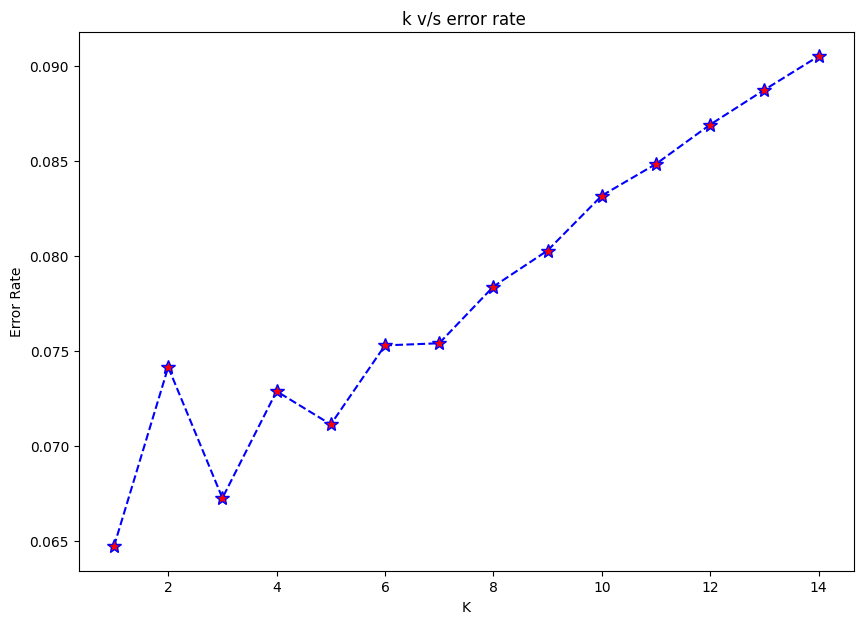

In [ ]:
Creating a list of different classification models 
from sklearn.metrics import roc_auc_score, roc_curve, mean_absolute_error,mean_squared_error,auc
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train,y_test = train_test_split(version1_x,version1_y,train_size=0.8,random_state=100)
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
plt.figure(figsize=(10,7))
plt.plot(range(1,15), error_rate, color='blue', linestyle='dashed',marker='*',markersize='10', markerfacecolor='red')
plt.title('k v/s error rate ')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
error_rate = []
for i in range(1,91):
    rfo = RandomForestClassifier(random_state=i)
    rfo.fit(X_train, y_train)
    pred_i = rfo.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
plt.figure(figsize=(10,7))
plt.plot(range(1,91), error_rate, color='blue', linestyle='dashed',marker='*',markersize='10', markerfacecolor='red')
plt.title('k v/s error rate ')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
model = RandomForestClassifier(n_estimators=90)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model.score(X_test,y_test)

0.9553625982117502